# 0. Imports

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Adiciona o diretório raiz ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from classes.ruleclassificator import RuleBasedClassifier, Rule, ClassLabel

import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
load_dotenv()

True

# 1. Data Loading

In [2]:
data = pd.read_csv(os.path.join(os.environ['PATH_DATA_PROCESSED'], 'pgm-dataset-processado.csv'))
data_sample = data.sample(frac=1, replace=False, random_state=42).drop(columns=(['teorTexto', 'documentos', 'anexos']))
data_sample = data_sample.to_dict(orient='list')

# Formata data_sample para uma lista de dicionários do formato {coluna:valor}
data_sample = [dict(zip(data_sample.keys(), valores)) for valores in zip(*data_sample.values())]

# Separando em dados de treinamento e teste
train_size = 0.7
X_train = data_sample[:int(len(data_sample)*train_size)]
X_test = data_sample[int(len(data_sample)*train_size):]

# 2. Classificador

In [3]:
rule_clf = RuleBasedClassifier()

## 2.1 - Funções

Definição das funções usadas nas regras

In [4]:
# Funções para a Fiscal
def fiscal1(data):
    return ('5952' in data['assuntos'])
def fiscal2(data):
    return ('10536' in data['assuntos'])    
def fiscal3(data):
    return ('5952' in data['assuntos'] and '10536' in data['assuntos'])

def fiscal4(data):
    return ('VEFT' in data['orgaoJulgador'])
def fiscal5(data):
    return ('Central de Avaliação e Arrematação' in data['orgaoJulgador'])

def fiscal6(data):
    return (data['classeProcesso'] == 1116)
def fiscal7(data):
    return (data['classeProcesso'] == 1118)

# Funções para a Administrativa
def adm1(data):
    return ('10299' in data['assuntos'])

# Funções para a Judicial
def jud1(data):
    return ('9992' in data['assuntos'])
def jud2(data):
    return ('10433' in data['assuntos'])
def jud3(data):
    return ('10502' in data['assuntos'])
def jud4(data):
    return ('9992' in data['assuntos'] and '10502' in data['assuntos'])

# Funções para a Patrimonial
def pat1(data):
    return ('10458' in data['assuntos'])
def pat2(data):
    return ('10121' in data['assuntos'])
def pat3(data):
    return ('10459' in data['assuntos'])
def pat4(data):
    return ('10457' in data['assuntos'])
def pat5(data):
    return (data['classeProcesso'] == 49)
def pat6(data):
    return (data['classeProcesso'] == 90)

# Funções para a Saúde
def saude1(data):
    return ('12500' in data['assuntos'])
def saude2(data):
    return ('12485' in data['assuntos'])
def saude3(data):
    return ('12491' in data['assuntos'])
def saude4(data):
    return ('12494' in data['assuntos'])
def saude5(data):
    return ('12501' in data['assuntos'])
def saude6(data):
    return ('12503' in data['assuntos'])
def saude7(data):
    return ('12511' in data['assuntos'])
def saude8(data):
    return (data['classeProcesso'] == 1706)

## 2.2 - Definição das Regras

Definição e atribuição das regras ao modelo

In [5]:
rule_clf.add_rule(Rule(funcao=fiscal1, nome='Fiscal - Assunto 5952', consequente=ClassLabel.FISCAL))
rule_clf.add_rule(Rule(funcao=fiscal2, nome='Fiscal - Assunto 10536', consequente=ClassLabel.FISCAL))
rule_clf.add_rule(Rule(funcao=fiscal3, nome='Fiscal - Assuntos 5952 e 10536', consequente=ClassLabel.FISCAL))
rule_clf.add_rule(Rule(funcao=fiscal4, nome='Fiscal - Órgão VEFT', consequente=ClassLabel.FISCAL))
rule_clf.add_rule(Rule(funcao=fiscal5, nome='Fiscal - Central Avaliação e Arrematação', consequente=ClassLabel.FISCAL))
rule_clf.add_rule(Rule(funcao=fiscal6, nome='Fiscal - Classe Processo 1116', consequente=ClassLabel.FISCAL))
rule_clf.add_rule(Rule(funcao=fiscal7, nome='Fiscal - Classe Processo 1118', consequente=ClassLabel.FISCAL))

# Regras para Administrativa
rule_clf.add_rule(Rule(funcao=adm1, nome='Administrativa - Assunto 10299', consequente=ClassLabel.ADMINISTRATIVA))

# Regras para Judicial
rule_clf.add_rule(Rule(funcao=jud1, nome='Judicial - Assunto 9992', consequente=ClassLabel.JUDICIAL))
rule_clf.add_rule(Rule(funcao=jud2, nome='Judicial - Assunto 10433', consequente=ClassLabel.JUDICIAL))
rule_clf.add_rule(Rule(funcao=jud3, nome='Judicial - Assunto 10502', consequente=ClassLabel.JUDICIAL))
rule_clf.add_rule(Rule(funcao=jud4, nome='Judicial - Assuntos 9992 e 10502', consequente=ClassLabel.JUDICIAL))

# Regras para Patrimonial
rule_clf.add_rule(Rule(funcao=pat1, nome='Patrimonial - Assunto 10458', consequente=ClassLabel.PATRIMONIAL))
rule_clf.add_rule(Rule(funcao=pat2, nome='Patrimonial - Assunto 10121', consequente=ClassLabel.PATRIMONIAL))
rule_clf.add_rule(Rule(funcao=pat3, nome='Patrimonial - Assunto 10459', consequente=ClassLabel.PATRIMONIAL))
rule_clf.add_rule(Rule(funcao=pat4, nome='Patrimonial - Assunto 10457', consequente=ClassLabel.PATRIMONIAL))
rule_clf.add_rule(Rule(funcao=pat5, nome='Patrimonial - Classe Processo 49', consequente=ClassLabel.PATRIMONIAL))
rule_clf.add_rule(Rule(funcao=pat6, nome='Patrimonial - Classe Processo 90', consequente=ClassLabel.PATRIMONIAL))

# Regras para Saúde
rule_clf.add_rule(Rule(funcao=saude1, nome='Saúde - Assunto 12500', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude2, nome='Saúde - Assunto 12485', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude3, nome='Saúde - Assunto 12491', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude4, nome='Saúde - Assunto 12494', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude5, nome='Saúde - Assunto 12501', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude6, nome='Saúde - Assunto 12503', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude7, nome='Saúde - Assunto 12511', consequente=ClassLabel.SAUDE))
rule_clf.add_rule(Rule(funcao=saude8, nome='Saúde - Classe Processo 1706', consequente=ClassLabel.SAUDE))

# 3. Treinamento

In [6]:
rule_clf.train(data=X_train)

## 3.1 - Avaliação das regras

In [7]:
rule_clf.calcular_metricas()

{'Fiscal - Assunto 5952': {'precisao': 0.9864552362074661, 'suporte': 3027},
 'Fiscal - Assunto 10536': {'precisao': 0.9888152444076223, 'suporte': 2414},
 'Fiscal - Assuntos 5952 e 10536': {'precisao': 0.989460370994941,
  'suporte': 2372},
 'Fiscal - Órgão VEFT': {'precisao': 0.9817485353762956, 'suporte': 4438},
 'Fiscal - Central Avaliação e Arrematação': {'precisao': 0.9946236559139785,
  'suporte': 186},
 'Fiscal - Classe Processo 1116': {'precisao': 0.9920339883165162,
  'suporte': 3766},
 'Fiscal - Classe Processo 1118': {'precisao': 0.9439252336448598,
  'suporte': 214},
 'Administrativa - Assunto 10299': {'precisao': 0.8645598194130926,
  'suporte': 886},
 'Judicial - Assunto 9992': {'precisao': 0.8008658008658008, 'suporte': 462},
 'Judicial - Assunto 10433': {'precisao': 0.8157894736842105, 'suporte': 228},
 'Judicial - Assunto 10502': {'precisao': 0.6467889908256881, 'suporte': 218},
 'Judicial - Assuntos 9992 e 10502': {'precisao': 0.8024691358024691,
  'suporte': 162},
 

# 4. Predição

In [8]:
y_pred_prob = rule_clf.predict(data=X_test)

In [9]:
y_pred_prob

[{'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Administrativa': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Judicial': 100.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Judicial': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Administrativa': 100.0},
 {'Fiscal': 100.0},
 {'Administrativa': 100.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Indefinido': 0.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Fiscal': 100.0},
 {'Administrativa': 100.0},
 {'Fiscal'

In [10]:
X_test[118]

{'setorDestino': 'Fiscal',
 'tipoAviso': 'Intimação',
 'orgaoJulgador': '1º JFP da Com. Natal',
 'assuntos': '5952;10433;9992',
 'classeProcesso': 14695}

In [11]:
# Recuperando apenas a classe da maior possibilidade
y_pred = [max(d.items(), key=lambda x: x[1])[0] for d in y_pred_prob]

In [12]:
# Recuperando o ground truth
y_test = [item['setorDestino'] for item in X_test]

# 5. Matriz de confusão

In [13]:
def plot_confusion_matrix(y_true, y_pred):


    # Recupera os nomes das classes reais
    classes_reais = sorted(set(y_true))

    # Recupera os nomes das classes preditas
    classes_pred = sorted(set(y_pred))

    # Cria a matriz de confusão
    cm = np.zeros(shape=(len(classes_reais), len(classes_pred)), dtype=int)

    # Preencher a matriz de confusão
    for real, previsto in zip(y_true, y_pred):
        i = classes_reais.index(real)   # Índice da classe real
        j = classes_pred.index(previsto) # Índice da classe prevista
        cm[i, j] += 1  # Incrementar contagem na posição correta
    
    # Normaliza a matriz para valores entre 0 e 1
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Cria o gráfico
    plt.figure(figsize=(10, 8))
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão', fontsize=16)
    plt.colorbar()
    
    # Adiciona rótulos
    plt.xticks(np.arange(len(classes_pred)), classes_pred, rotation=45, fontsize=6)
    plt.yticks(np.arange(len(classes_reais)), classes_reais, fontsize=8)
    
    # Adiciona os valores na matriz
    thresh = cm_normalized.max() / 2.
    for i, j in np.ndindex(cm_normalized.shape):
        plt.text(j, i, f'{cm[i, j]}\n\n({cm_normalized[i, j]*100:.2f})',
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black",
                 fontsize=10)
    
    plt.ylabel('Classe Real', fontsize=14)
    plt.xlabel('Classe Prevista', fontsize=14)
    plt.tight_layout()
    plt.show()

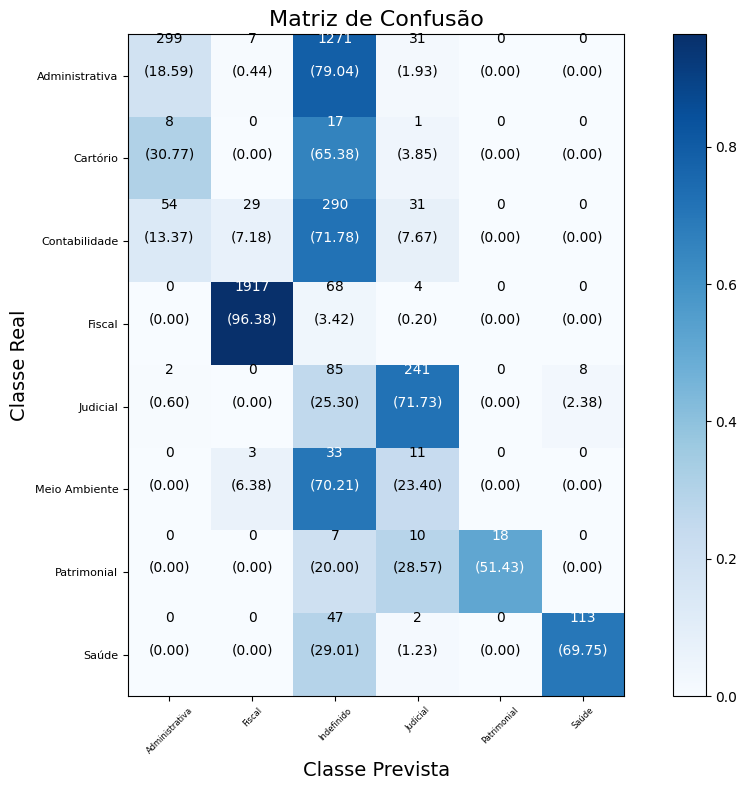

In [14]:
plot_confusion_matrix(y_test, y_pred, )

In [17]:
df = pd.read_parquet('/home/esdras-daniel/Downloads/pgm-dataset.parquet')

In [19]:
df['intimacaoPJE'][0]

'{"id": "18612632", "tipoComunicacao": "INT", "tipoPrazo": "DATA_CERTA", "dataReferencia": "20240621050040", "prazo": "0", "nivelSigilo": "0", "processo": "08387198120248205001", "idDocumento": "123585416", "tipoDocumento": "4050017", "dataHora": "20240614084713", "mimetype": "text/html", "movimento": "123440506", "hash": "3d32d8db5ec0bb483490f8d85bfcdd41", "descricao": "Intima\x87Æo", "dataAssinatura": "20240612154305"}'

In [20]:
df['processoPJE'][0]

'{"Numero": "08387198120248205001", "Competencia": "53", "Classe-Processual": "1706", "Codigo-Localidade": "118", "Nivel-Sigilo": "0", "Data-Ajuizamento": "12/06/2024 - 14:22:17", "Valor-Causa": "599.98", "Magistrado-Atuante": ["42251559434", "17664632153"], "Orgao-Julgador": "2ª Vara da Infância e Juventude da Comarca de Natal", "Assuntos": [{"CodigoNacional": "12485", "Principal": true}, {"CodigoNacional": "12494", "Principal": false}], "Processos-Vinculados": [], "Status-Processo": "", "Polos": [{"Polo": "AT", "Partes": [{"Assistencia-Judiciaria": "true", "Intimacao-Pendente": "0", "Pessoa": "MARINA PAULINO DANTAS", "Tipo-Pessoa": "fisica", "Documento-Principal": "17969296467", "Polo": "AT", "Documentos": [{"Codigo-Documento": "179.692.964-67", "Emissor-Documento": "Secretaria da Receita Federal do Brasil", "Tipo-Documento": "CMF", "Nome-Documento": "MARINA PAULINO DANTAS"}], "Endereco": {"@cep": "59072433", "ns2:logradouro": "Rua Padre Cícero", "ns2:numero": "381", "ns2:bairro": "F

In [23]:
df['teorIntimacao'][0]

'PODER JUDICIÁRIO ESTADO DO RIO GRANDE DO NORTE 2ª VARA DA INFÂNCIA E DA JUVENTUDE DA COMARCA DE NATAL PROCESSO Nº0838719-81.2024.8.20.5001 AÇÃO DE:PROCEDIMENTO COMUM INFÂNCIA E JUVENTUDE (1706)  DESPACHO  Antes do pronunciamento sobre o pedido de tutela de urgência, por prudência, intime-se o Município de Natal, por meio de seu Procurador e Secretário de Saúde, para, no prazo de 72 (setenta e duas) horas, prestar informações acerca do pleito. Por oportuno, requisite-se à Câmara Técnica, por meio do sistema e-NATJUS/RN, a emissão de Resposta Técnica, nos termos do art. 2º, I, da Portaria n° 1.214/2016-TJ, de 21 de setembro de 2016, no prazo de 72 (setenta e duas) horas, no afã de que emita nota técnica no caso do autor. Após, voltem os autos conclusos. Publique-se. Cumpra-se. Natal/RN,12 de junho de 2024  SÉRGIO ROBERTO DO NASCIMENTO MAIA Juiz de Direito'

In [24]:
df.shape

(15966, 7)